# 3. Практические задания в Jupyter Notebook

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import plotly.express as px
from matplotlib import pyplot as plt
from sklearn import datasets
import plotly
import plotly.graph_objects as go
import statistics
import pickle
from os import path
from IPython.display import display
from pprint import pprint
import requests
import time

In [4]:
solar_data = pd.read_csv('D:/data/solarpower.csv', sep = ',')
solarpower = solar_data.copy()
solarpower.head()

,date,cum_power
0,2017-01-01,20111.0
1,2017-01-02,20112.0
2,2017-01-03,20115.0
3,2017-01-04,20117.0
4,2017-01-05,20119.0


### Задание 3.1
В нашем временном ряде есть несколько пропусков, они обозначены числом -1. Заполните пропуски средним арифметическим между двумя соседними наблюдениями:

1 способ:

In [5]:
# Замена значений -1 на NaN для корректного вычисления среднего
solarpower.replace(-1, pd.NA, inplace=True)
# Заполнение пропусков средним арифметическим между двумя соседними наблюдениями
solarpower['cum_power'].fillna(method='ffill', inplace=True)
solarpower['cum_power'].fillna(method='bfill', inplace=True)
# Вычисление среднего арифметического
average_cum_power = round(solarpower['cum_power'].mean())
print(average_cum_power)

23848


C:\Users\User\AppData\Local\Temp\ipykernel_15096\3484183922.py:5: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  solarpower['cum_power'].fillna(method='ffill', inplace=True)
C:\Users\User\AppData\Local\Temp\ipykernel_15096\3484183922.py:6: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  solarpower['cum_power'].fillna(method='bfill', inplace=True)


2 способ:

In [6]:
# Замена значений -1 на NaN для корректного вычисления среднего
solarpower.replace(-1, pd.NA, inplace=True)
# Интерполяция пропущенных значений
solarpower['cum_power'].interpolate(inplace=True)
# Вычисление среднего арифметического
average_cum_power = round(solarpower['cum_power'].mean())
print(average_cum_power)

23848


### Задание 3.2
Теперь, когда таблица заполнена, создайте столбец *day_power* — ежедневная выработка солнечной энергии.

Далее создайте данные о средней ежедневной выработке энергии на каждый месяц-год.

*Совет: для того чтобы выделить из даты год и месяц, проще всего будет воспользоваться методом аксессора dt.to_period('M'), который позволяет выделять периоды (в данном случае 'М' — месяц).*

Затем сгруппируйте данные по периодам (год-месяц) и рассчитайте среднее в столбце *day_power*.

Сколько солнечной энергии в среднем в день выработали в марте 2017 года? Ответ округлите до целого.

In [15]:
solarpower['day_power'] = solarpower['cum_power'].diff() # разница между значениями 'cum_power' на текущий и предыдущий дни
solarpower['day_power'].iloc[0] = 0 # Заполняем первое значение в новом столбце нулем
solarpower['date'] = pd.to_datetime(solarpower['date']) # datetime
solarpower['year_month'] = solarpower['date'].dt.to_period('M') # Создаем столбцы для года и месяца
average_daily_power = solarpower.groupby('year_month')['day_power'].mean() # Группируем данные по периодам (год-месяц) и рассчитываем среднее значение в столбце
print(average_daily_power) # выводим

average_daily_power_march_2017 = round(average_daily_power['2017-03'])
print("Средняя ежедневная выработка энергии в марте 2017 года:", average_daily_power_march_2017)

year_month
2017-01     3.129032
2017-02     3.714286
2017-03    10.774194
2017-04    16.300000
2017-05    19.000000
2017-06    21.500000
2017-07    18.129032
2017-08    15.064516
2017-09    11.533333
2017-10     6.419355
2017-11     3.233333
2017-12     1.161290
2018-01     2.064516
2018-02     6.928571
2018-03     8.709677
2018-04    14.633333
2018-05    21.032258
2018-06    18.766667
2018-07    22.000000
2018-08    17.096774
2018-09    13.866667
2018-10     9.000000
Freq: M, Name: day_power, dtype: float64
Средняя ежедневная выработка энергии в марте 2017 года: 11


C:\Users\User\AppData\Local\Temp\ipykernel_15096\1662631880.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  solarpower['day_power'].iloc[0] = 0 # Заполняем первое значение в новом столбце нулем


In [16]:
print(solarpower)

          date  cum_power  day_power year_month
0   2017-01-01    20111.0        0.0    2017-01
1   2017-01-02    20112.0        1.0    2017-01
2   2017-01-03    20115.0        3.0    2017-01
3   2017-01-04    20117.0        2.0    2017-01
4   2017-01-05    20119.0        2.0    2017-01
..         ...        ...        ...        ...
659 2018-10-22    28101.0        6.0    2018-10
660 2018-10-23    28109.0        8.0    2018-10
661 2018-10-24    28115.0        6.0    2018-10
662 2018-10-25    28117.0        2.0    2018-10
663 2018-10-26    28120.0        3.0    2018-10

[664 rows x 4 columns]


### Задание 3.3

Постройте график временного ряда — средней ежедневной выработки солнечной энергии на каждый месяц-год. Не забудьте подписать оси и сам график.

Выберите вывод, который можно сделать из полученного графика:

*С помощью plt()*

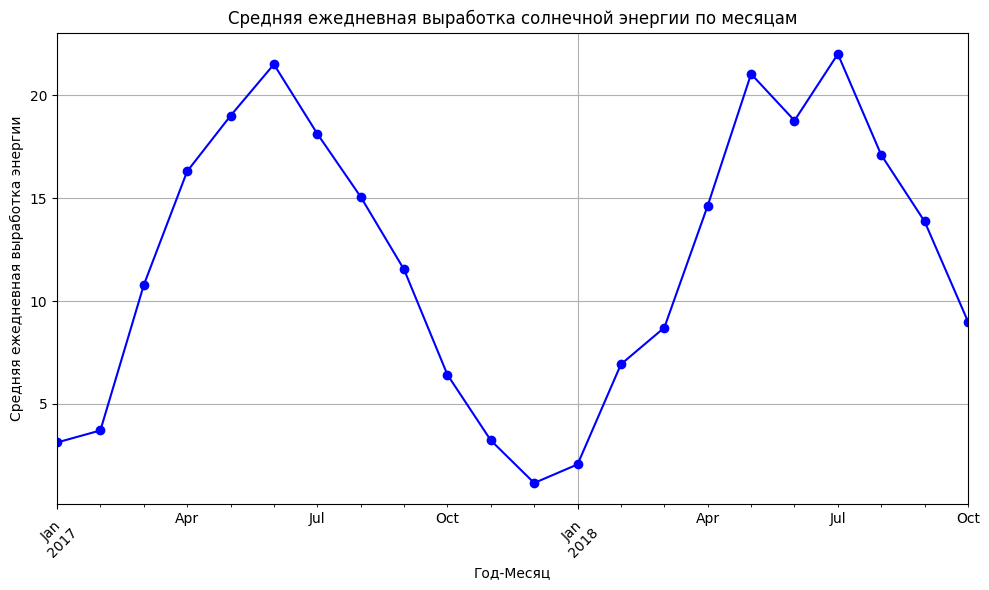

In [17]:
plt.figure(figsize=(10, 6))
average_daily_power.plot(kind='line', marker='o', color='b', linestyle='-')
plt.title('Средняя ежедневная выработка солнечной энергии по месяцам')
plt.xlabel('Год-Месяц')
plt.ylabel('Средняя ежедневная выработка энергии')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Вывод:**
В период с Апреля по Август увеличивается выработка солнечной энергии ввиду начала летнего периода.